In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install geopandas
import geopandas


In [ ]:
regioni =  geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/regioni.zip")
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/NIL_WM.zip")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/province.zip")
redditi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.zip (Unzipped Files)/Redditi_e_principali_variabili_IRPEF_su_base_comunale_CSV_2020.csv")
redditi

,Anno di imposta,Codice catastale,Codice Istat Comune,Denominazione Comune,Sigla Provincia,Regione,Codice Istat Regione,Numero contribuenti,Reddito da fabbricati - Frequenza,Reddito da fabbricati - Ammontare in euro,...,Reddito complessivo da 26000 a 55000 euro - Frequenza,Reddito complessivo da 26000 a 55000 euro - Ammontare in euro,Reddito complessivo da 55000 a 75000 euro - Frequenza,Reddito complessivo da 55000 a 75000 euro - Ammontare in euro,Reddito complessivo da 75000 a 120000 euro - Frequenza,Reddito complessivo da 75000 a 120000 euro - Ammontare in euro,Reddito complessivo oltre 120000 euro - Frequenza,Reddito complessivo oltre 120000 euro - Ammontare in euro,field_51,geometry
0,2020,A001,028001,ABANO TERME,PD,Veneto,05,14831,7564,9593119,...,3268,114839495,413,26106754,400,37267762,177,35077122,,None
1,2020,A004,098001,ABBADIA CERRETO,LO,Lombardia,03,208,89,78204,...,41,1302555,,,,,0,0,,None
2,2020,A005,097001,ABBADIA LARIANA,LC,Lombardia,03,2451,1205,1802637,...,656,22609959,78,4903386,48,4323860,31,5299024,,None
3,2020,A006,052001,ABBADIA SAN SALVATORE,SI,Toscana,09,4855,2667,2731533,...,754,25651776,69,4391549,33,3001230,13,2879460,,None
4,2020,A007,095001,ABBASANTA,OR,Sardegna,20,1728,885,739857,...,430,14325272,26,1655926,13,1172342,,,,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7899,2020,M428,075098,PRESICCE-ACQUARICA,LE,Puglia,16,6251,2376,2132368,...,580,19690477,31,1911397,25,2212573,15,3447739,,None
7900,2020,M429,022252,BORGO D'ANAUNIA,TN,Trentino Alto Adige(P.A.Trento),04,2050,803,1304716,...,498,17366505,35,2265069,21,1848437,8,1959769,,None
7901,2020,M430,022253,NOVELLA,TN,Trentino Alto Adige(P.A.Trento),04,3579,1210,1659890,...,667,22868038,40,2490656,31,2852464,10,1876163,,None
7902,2020,M431,022254,VILLE DI FIEMME,TN,Trentino Alto Adige(P.A.Trento),04,2102,896,1015747,...,497,17515916,47,2946010,21,2064994,20,3869894,,None


In [ ]:
province

In [ ]:
comuni

1. l'ammontare del reddito da lavoro dipendente (colonna L del dataset) per ogni regione e relativo grafico a torta

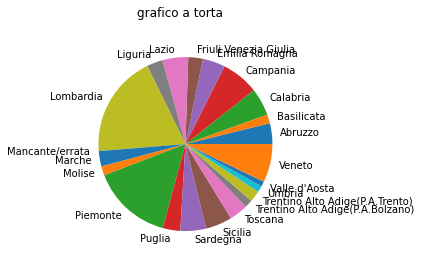

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

ammontarereddito = redditi.groupby("Regione",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()


fig = plt.figure()
ax = plt.axes()
ax.pie(ammontarereddito["Reddito da lavoro dipendente e assimilati - Ammontare in euro"],labels = ammontarereddito["Regione"])

fig.suptitle("grafico a torta")

plt.show()


2. l'ammontare del reddito da lavoro dipendente per ogni provincia e relativo grafico a barre verticali

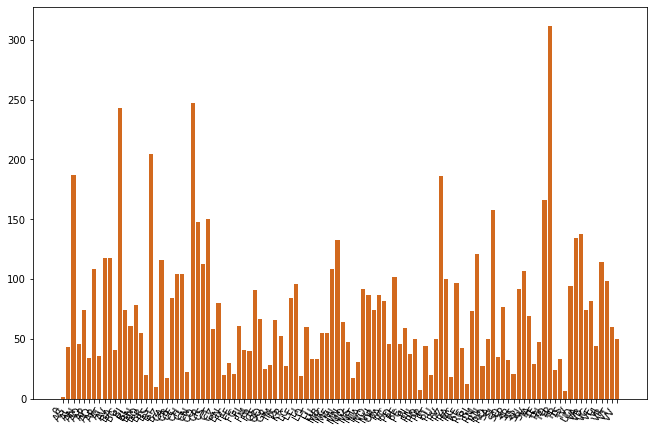

In [ ]:
ammontarereddito1 = redditi.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count()
ammontarereddito1.drop_duplicates()
fig = plt.figure(figsize=(11,8))
ax = plt.axes()
x = ammontarereddito1["Sigla Provincia"]
y = ammontarereddito1["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]
ax.bar(x, y, color="chocolate")
fig.autofmt_xdate(rotation=60) 

plt.show()


3. la prime 10 province più ricche

In [ ]:
#metodo1
ammontarereddito1.sort_values(ascending=False,by="Reddito da lavoro dipendente e assimilati - Ammontare in euro").head(10)
#metodoconvenevole


ValueError: ignored

4. la provincia più ricca


In [ ]:
ammontarereddito1.sort_values(ascending=False,by="Reddito da lavoro dipendente e assimilati - Ammontare in euro").head(1)

5. il reddito medio per ogni regione. Ordinare in ordine decrescente a partire dalla regione con il reddito medio più alto

In [ ]:
ammontarereddito3 = redditi.groupby("Regione")["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].mean() #sum
ammontarereddito3.mean()
#media = df1.mean()["Indirizzo"]
#df1.loc[df1["Indirizzo"] >= media] ["Indirizzo"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Reddito da lavoro dipendente e assimilati - Ammontare in euro    359.272727
dtype: float64

6. dato il nome di una regione, inserito dall'utente, avere l'elenco delle province della regione con il reddito complessivo e il reddito medio

In [ ]:

regione = input("inserire nome regione")
regioneutente =  redditi[redditi.Regione.str.contains(regione)]
SommaLista = regioneutente.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sarebbe sum
Medialista = regioneutente.groupby("Sigla Provincia",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sarebbe mean
SommaLista["Media"] = Medialista["Reddito da lavoro dipendente e assimilati - Ammontare in euro"]
SommaLista

inserire nome regioneLazio


,Sigla Provincia,Reddito da lavoro dipendente e assimilati - Ammontare in euro,Media
0,FR,91,91
1,LT,33,33
2,RI,73,73
3,RM,121,121
4,VT,60,60


7. dato il nome di una provincia, inserito dall'utente, avere l'elenco dei comuni della provincia con il reddito. Ordinare in ordine crescente sul reddito. 

In [ ]:

provincia = input("inserire nome provincia")
listaComuni = redditi[redditi["Sigla Provincia"] == provincia]
listaComuni = listaComuni.groupby("Denominazione Comune",as_index = False)["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].count() #sum
listaComuni.sort_values(by = "Reddito da lavoro dipendente e assimilati - Ammontare in euro",ascending = False,inplace = True)
listaComuni


inserire nome provinciaFR


,Denominazione Comune,Reddito da lavoro dipendente e assimilati - Ammontare in euro
0,ACQUAFONDATA,1
68,SANT'ELIA FIUMERAPIDO,1
66,SANT'ANDREA DEL GARIGLIANO,1
65,SANT'AMBROGIO SUL GARIGLIANO,1
64,SAN VITTORE DEL LAZIO,1
...,...,...
28,COLLEPARDO,1
27,COLLE SAN MAGNO,1
26,COLFELICE,1
25,CERVARO,1


8. trovare la regione a cui appartiene il comune con il reddito più basso: visualizzare la mappa del comune e della regione

In [ ]:
comunebasso =  redditi[redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"] == redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].min()][["Regione","Denominazione Comune"]]
comunebasso                                                                                                                                                                                                                                                                                                                                                             








,Regione,Denominazione Comune
3258,Valle d'Aosta,HONE


9. trovare la provincia a cui appartiene il comune con il reddito più basso: visualizzare la mappa del comune e della regione

In [ ]:
provinciabassa =  redditi[redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"] == redditi["Reddito da lavoro dipendente e assimilati - Ammontare in euro"].min()][["Sigla Provincia","Denominazione Comune"]]
provinciabassa         

,Sigla Provincia,Denominazione Comune
3258,AO,HONE
